In [3]:
import pandas as pd 
# Used for data manipulation and analysis
import numpy as np
# Numerical Python, for mathematical operations
import matplotlib.pyplot as plt 
import matplotlib as mpl
mpl.rcParams['patch.force_edgecolor'] = True
# import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
%matplotlib inline

In [4]:
filepath = '/Users/izzy/Documents/twitter-bot-detection-master/kaggle_data/'
file = filepath+'training_data_2_csv_UTF.csv'
# Get dataset from local path
training_data = pd.read_csv(file)
# Read it using pandas csv read function
bots = training_data[training_data.bot==1]
humanacc = training_data[training_data.bot==0]

In [ ]:
# Comparing followers of a human account to a bot account

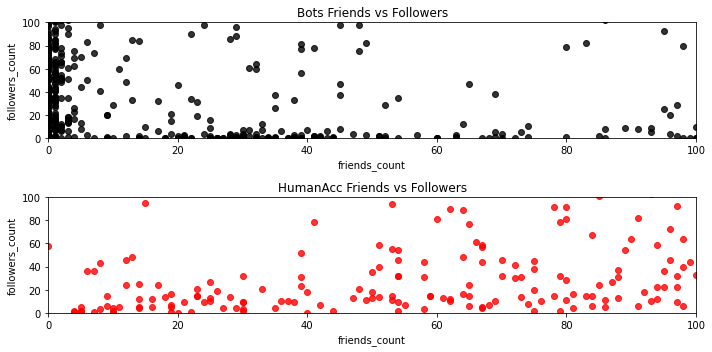

In [4]:
bots.friends_count/bots.followers_count

plt.figure(figsize=(10,5))
plt.subplot(2,1,1)
plt.title('Bots Friends vs Followers')
sns.regplot(bots.friends_count, bots.followers_count, color='black', label='Bots')
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.tight_layout()
# Plots friends and followers list of bots 

plt.subplot(2,1,2)
plt.title('Human Account Friends vs Followers')
sns.regplot(humanacc.friends_count, humanacc.followers_count, color='red', label='Human')
plt.xlim(0, 100)
plt.ylim(0, 100)

plt.tight_layout()
plt.show()

In [ ]:
# Performing Feature engineering

In [5]:
filepath = '/Users/izzy/Documents/twitter-bot-detection-master/kaggle_data/'
file = open(filepath+'training_data_2_csv_UTF.csv', mode='r', encoding='utf-8', errors = 'ignore')

training_data = pd.read_csv(file)

bag_of_words_bot = r'bot|b0t|cannabis|tweet me|mishear|follow me|updates every|gorilla|yes_ofc|forget' \
                    r'expos|kill|clit|bbb|butt|fuck|XXX|sex|truthe|fake|anony|free|virus|funky|RNA|kuck|jargon' \
                    r'nerd|swag|jack|bang|bonsai|chick|prison|paper|pokem|xx|freak|ffd|dunia|clone|genie|bbb' \
                    r'ffd|onlyman|emoji|joke|troll|droop|free|every|wow|cheese|yeah|bio|magic|wizard|face'

training_data['screen_name_binary'] = training_data.screen_name.str.contains(bag_of_words_bot, case=False, na=False)
training_data['name_binary'] = training_data.name.str.contains(bag_of_words_bot, case=False, na=False)
training_data['description_binary'] = training_data.description.str.contains(bag_of_words_bot, case=False, na=False)
training_data['status_binary'] = training_data.status.str.contains(bag_of_words_bot, case=False, na=False)

In [ ]:
# Performing Feature Extraction

In [6]:
training_data['listed_count_binary'] = (training_data.listed_count>20000)==False
features = ['screen_name_binary', 'name_binary', 'description_binary', 'status_binary', 'verified', 'followers_count', 'friends_count', 'statuses_count', 'listed_count_binary', 'bot']

In [ ]:
# Decision Tree Classifier 

Trainig Accuracy: 0.88707
Test Accuracy: 0.87857


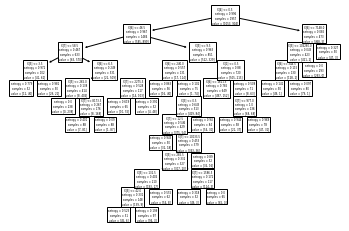

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn import tree

x = training_data[features].iloc[:,:-1]
y = training_data[features].iloc[:,-1]

dt = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=50, min_samples_split=10)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

dt = dt.fit(x_train, y_train)
y_pred_train = dt.predict(x_train)
y_pred_test = dt.predict(x_test)

print("Training Accuracy: %.5f" %accuracy_score(y_train, y_pred_train))
print("Test Accuracy: %.5f" %accuracy_score(y_test, y_pred_test))

tree.plot_tree(dt);


In [ ]:
# Random Forest Algorithm

In [9]:
from sklearn.ensemble import RandomForestClassifier

x = training_data[features].iloc[:,:-1]
y = training_data[features].iloc[:,-1]

rf = RandomForestClassifier(criterion='entropy', min_samples_leaf=100, min_samples_split=20)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

rf = rf.fit(x_train, y_train)
y_pred_train = rf.predict(x_train)
y_pred_test = rf.predict(x_test)

print("Training Accuracy: %.5f" %accuracy_score(y_train, y_pred_train))
print("Test Accuracy: %.5f" %accuracy_score(y_test, y_pred_test))



Trainig Accuracy: 0.88043
Test Accuracy: 0.86310


In [ ]:
from 